In [476]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [477]:
df = pd.read_csv("nigeria_messy_sales_dataset.csv")
df.head(20)

,Customer Name,State,Product,Units Sold,Unit Price,Total Sale,Sale Date,Sales Channel,Order ID
0,NaN,rivers,KEYBOARD,NaN,NaN,NaN,2025-04-27,Online,NaN
1,Allison Hill,Lagos,Headphones,NaN,267992.94,NaN,2024-03-15,Wholesale,4c636e95-025f-4543-8997-623ae0723d96
2,Noah Rhodes,Anambra,Keyboard,NaN,42364.41,NaN,2024-12-10,NaN,edaf3766-1b78-4ede-9a4f-fc0c9165f2ed
3,Angie Henderson,Delta,Keyboard,NaN,279444.94,NaN,2024-04-05,NaN,74503887-48d9-4846-95c5-51fcfba57cc8
4,Daniel Wagner,Delta,Tablet,NaN,95899.74,NaN,2025-01-12,NaN,8639bd41-8b15-4d94-a42d-0cd7fd359f6a
5,Cristian Santos,Oyo,Camera,NaN,118189.90,NaN,2023-08-30,Direct,225aed6c-f045-4043-a3a6-8a707e710b55
6,Connie Lawrence,Rivers,Tablet,36.0,185141.90,6665108.40,2024-09-10,Wholesale,45d8a6ad-77d0-459e-8114-14f8d9df0d0e
7,Abigail Shaffer,Imo,Keyboard,NaN,252859.28,NaN,2024-09-04,Online,54a7b69b-1cd6-4b09-8f0e-6d2b315c167a
8,Gina Moore,Kano,CAMERA,NaN,178320.53,NaN,2024-02-21,Wholesale,a5f60735-757b-4b29-bb2a-a1462999394c
9,Gabrielle Davis,plateau,Tablet,NaN,152440.84,NaN,2025-06-02,Direct,039b058c-2faa-4e0b-b7f6-0cdf41dc1c60


Identificando que existe uma versão uppercase de cada coluna e tratando essa duplicidade

In [478]:
df["Product"].unique()

array(['KEYBOARD', 'Headphones', 'Keyboard', 'Tablet', 'Camera', 'CAMERA',
       'Laptop', 'Charger', 'CHARGER', 'Monitor', 'LAPTOP', 'Phone',
       'MONITOR', 'PHONE', 'TABLET', 'HEADPHONES'], dtype=object)

In [479]:
df["Product"] = df["Product"].str.capitalize() # produtos possuem linhas de um mesma produto em upper case, gerando uma categoria nova, porém igual
df["Product"].unique()


array(['Keyboard', 'Headphones', 'Tablet', 'Camera', 'Laptop', 'Charger',
       'Monitor', 'Phone'], dtype=object)

Verificando se existem valores duplicados

In [480]:
df.duplicated().sum()

0

Transformando a coluna de Data no tipo datetime

In [481]:
df["Sale Date"] = pd.to_datetime(df["Sale Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer Name  507 non-null    object        
 1   State          550 non-null    object        
 2   Product        550 non-null    object        
 3   Units Sold     155 non-null    float64       
 4   Unit Price     495 non-null    float64       
 5   Total Sale     137 non-null    float64       
 6   Sale Date      550 non-null    datetime64[ns]
 7   Sales Channel  444 non-null    object        
 8   Order ID       510 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 38.8+ KB


Verificando se existem valores vazios

In [482]:
df.isna().sum()

Customer Name     43
State              0
Product            0
Units Sold       395
Unit Price        55
Total Sale       413
Sale Date          0
Sales Channel    106
Order ID          40
dtype: int64

As linhas de vazias de unit price possuem no maximo as unidates vendidas, portanto, agruparei por produto e substituirei valores vazios pela mediana

In [483]:
df[df["Unit Price"].isna()].head(10)

,Customer Name,State,Product,Units Sold,Unit Price,Total Sale,Sale Date,Sales Channel,Order ID
0,NaN,rivers,Keyboard,NaN,NaN,NaN,2025-04-27,Online,NaN
10,Ryan Munoz,Niger,Keyboard,NaN,NaN,NaN,2024-02-28,Direct,4b86b5a1-ca6f-4ff8-964c-fbd2bc92fd81
20,Lisa Jackson,Enugu,Camera,36.0,NaN,NaN,2024-04-16,NaN,951c25d5-4d4c-4280-9462-52e7f43ba052
30,Stephanie Ross,Sokoto,Phone,NaN,NaN,NaN,2023-07-31,Wholesale,7a6a2107-2231-4050-b515-94943818cfd3
40,Sherri Baker,Osun,Monitor,NaN,NaN,NaN,2025-05-27,Retail,33c08bf1-8167-499f-a723-ada38c32bdb2
50,John Pierce,Borno,Charger,NaN,NaN,NaN,2025-02-27,Online,41241bb4-655c-4508-8592-bfa5b928e23f
60,Michael Lewis,Delta,Headphones,NaN,NaN,NaN,2024-07-06,Wholesale,e42e707a-fe2b-4987-9fdc-abbf6b9cd71c
70,Jessica Callahan,Anambra,Charger,NaN,NaN,NaN,2024-10-09,Retail,NaN
80,Lauren Daniels,Imo,Camera,NaN,NaN,NaN,2023-10-15,Wholesale,3ea6e5b2-0c76-4d28-9f49-5037b40a9181
90,Paul Jones,enugu,Keyboard,NaN,NaN,NaN,2024-04-04,NaN,69df14e9-3896-41dd-8570-b59fa903ae67


In [484]:
df["Unit Price"] = df.groupby("Product")["Unit Price"].transform(
    lambda x: x.fillna(x.median())
)

df.loc[0]

Customer Name                    NaN
State                         rivers
Product                     Keyboard
Units Sold                       NaN
Unit Price                190984.105
Total Sale                       NaN
Sale Date        2025-04-27 00:00:00
Sales Channel                 Online
Order ID                         NaN
Name: 0, dtype: object

In [485]:
df.isna().sum()

Customer Name     43
State              0
Product            0
Units Sold       395
Unit Price         0
Total Sale       413
Sale Date          0
Sales Channel    106
Order ID          40
dtype: int64

Filtrando linhas em que Units Sold não seja nula e Total Sale seja nula para aplicar uma multiplicação entre unidade vendida e preço unitario para obter o Total Sale

In [486]:
filtro = df["Units Sold"].notnull() & df["Total Sale"].isna()
df[filtro]


,Customer Name,State,Product,Units Sold,Unit Price,Total Sale,Sale Date,Sales Channel,Order ID
20,Lisa Jackson,Enugu,Camera,36.0,125142.990,NaN,2024-04-16,NaN,951c25d5-4d4c-4280-9462-52e7f43ba052
100,Denise Jacobs,Delta,Laptop,35.0,144201.130,NaN,2024-09-10,Direct,3db0174e-7938-478a-89b5-aab0c12169db
140,Megan Orr,Bauchi,Charger,16.0,146234.180,NaN,2024-11-18,Retail,NaN
160,Stephanie Salazar,Borno,Keyboard,47.0,190984.105,NaN,2023-11-10,NaN,863e1f2a-18a8-46ef-ab05-3fc41b656dab
170,Joshua Perry,Oyo,Keyboard,82.0,190984.105,NaN,2025-05-10,Wholesale,608e2f5c-6117-4270-a7c0-518b17efa621
180,Alyssa Long,imo,Laptop,10.0,144201.130,NaN,2024-08-13,NaN,8b040f53-e639-49d4-87c6-8688ecf32053
190,Alex Hernandez,Delta,Laptop,57.0,144201.130,NaN,2023-10-28,Wholesale,ca5e151b-23d3-4d4c-bd5f-f093c16f9bcc
200,Lindsay Martinez,Kano,Phone,83.0,176560.925,NaN,2025-06-10,Wholesale,601bfbcb-f0ee-4cce-8d93-e14a5b167158
230,Melissa Martinez,Abuja,Monitor,78.0,141745.840,NaN,2024-07-29,Direct,614077d3-9ec4-4a48-9773-f98d550c2fe9
260,NaN,Abuja,Camera,49.0,125142.990,NaN,2023-09-06,NaN,1bffa279-15c1-404f-aa16-3354a35fc9c1


In [487]:
df.loc[filtro,"Total Sale"] = df.loc[filtro,"Unit Price"] * df.loc[filtro,"Units Sold"]

In [488]:
df.isna().sum()

Customer Name     43
State              0
Product            0
Units Sold       395
Unit Price         0
Total Sale       395
Sale Date          0
Sales Channel    106
Order ID          40
dtype: int64

In [489]:
df["Units Sold"] = df.groupby("Product")["Units Sold"].transform(
    lambda x: x.fillna(x.median())
)

df.isna().sum()

Customer Name     43
State              0
Product            0
Units Sold         0
Unit Price         0
Total Sale       395
Sale Date          0
Sales Channel    106
Order ID          40
dtype: int64

In [490]:
df["Units Sold"] = df["Units Sold"].astype(int) # transformando units sold em inteiro

In [492]:
df["Total Sale"] = df["Total Sale"].fillna(df["Units Sold"] * df["Unit Price"])

In [493]:
df.isna().sum()

Customer Name     43
State              0
Product            0
Units Sold         0
Unit Price         0
Total Sale         0
Sale Date          0
Sales Channel    106
Order ID          40
dtype: int64

Configurando como "não informado" caso o nome do cliente e canal de vendas sejam vazios

In [494]:
df["Sales Channel"] = df["Sales Channel"].replace({np.nan:"Nao informado"})
df["Customer Name"] = df["Customer Name"].replace({np.nan:"Nao informado"})
df.isna().sum()

Customer Name     0
State             0
Product           0
Units Sold        0
Unit Price        0
Total Sale        0
Sale Date         0
Sales Channel     0
Order ID         40
dtype: int64

In [495]:
df.head()

,Customer Name,State,Product,Units Sold,Unit Price,Total Sale,Sale Date,Sales Channel,Order ID
0,Nao informado,rivers,Keyboard,56,190984.105,10695109.88,2025-04-27,Online,NaN
1,Allison Hill,Lagos,Headphones,50,267992.940,13399647.00,2024-03-15,Wholesale,4c636e95-025f-4543-8997-623ae0723d96
2,Noah Rhodes,Anambra,Keyboard,56,42364.410,2372406.96,2024-12-10,Nao informado,edaf3766-1b78-4ede-9a4f-fc0c9165f2ed
3,Angie Henderson,Delta,Keyboard,56,279444.940,15648916.64,2024-04-05,Nao informado,74503887-48d9-4846-95c5-51fcfba57cc8
4,Daniel Wagner,Delta,Tablet,43,95899.740,4123688.82,2025-01-12,Nao informado,8639bd41-8b15-4d94-a42d-0cd7fd359f6a


Retirando o Order ID do dataset, pois não será necessária para nenhuma análise

In [496]:
df = df[["Customer Name","State","Product","Units Sold","Unit Price","Total Sale","Sale Date","Sales Channel"]]
df.head()

,Customer Name,State,Product,Units Sold,Unit Price,Total Sale,Sale Date,Sales Channel
0,Nao informado,rivers,Keyboard,56,190984.105,10695109.88,2025-04-27,Online
1,Allison Hill,Lagos,Headphones,50,267992.940,13399647.00,2024-03-15,Wholesale
2,Noah Rhodes,Anambra,Keyboard,56,42364.410,2372406.96,2024-12-10,Nao informado
3,Angie Henderson,Delta,Keyboard,56,279444.940,15648916.64,2024-04-05,Nao informado
4,Daniel Wagner,Delta,Tablet,43,95899.740,4123688.82,2025-01-12,Nao informado


Multiplicado o Valor Toal e o preço da unidade por 0.0036 para transformar o valor da moeda nigeriana para o real brasileiro

In [497]:
df["Total Sale"] = round(df["Total Sale"] * 0.0036, 2)
df["Unit Price"] = round(df["Unit Price"] * 0.0036, 2)
df.head(20)

,Customer Name,State,Product,Units Sold,Unit Price,Total Sale,Sale Date,Sales Channel
0,Nao informado,rivers,Keyboard,56,687.54,38502.40,2025-04-27,Online
1,Allison Hill,Lagos,Headphones,50,964.77,48238.73,2024-03-15,Wholesale
2,Noah Rhodes,Anambra,Keyboard,56,152.51,8540.67,2024-12-10,Nao informado
3,Angie Henderson,Delta,Keyboard,56,1006.00,56336.10,2024-04-05,Nao informado
4,Daniel Wagner,Delta,Tablet,43,345.24,14845.28,2025-01-12,Nao informado
5,Cristian Santos,Oyo,Camera,36,425.48,15317.41,2023-08-30,Direct
6,Connie Lawrence,Rivers,Tablet,36,666.51,23994.39,2024-09-10,Wholesale
7,Abigail Shaffer,Imo,Keyboard,56,910.29,50976.43,2024-09-04,Online
8,Gina Moore,Kano,Camera,36,641.95,23110.34,2024-02-21,Wholesale
9,Gabrielle Davis,plateau,Tablet,43,548.79,23597.84,2025-06-02,Direct


Analisando a coluna de Produtos, percebe que os valores de fones e carregadores estão muito altos. 

Obviamente existe uma relatividade entre o preço nigeriano dos produtos e o brasileiro, mas verificando em sites nigerianos,

concluí que esses produtos estavam com preços bastante altos devido a uma grande falta de informação inicial 

Decidi aplicar uma redução percentual com base em uma consulta do preço "máximo" comumente encontrado desses produtos 

In [498]:
df.groupby("Product")["Unit Price"].describe() ## teclados, fones e carregadores mt acima

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
Camera,65.0,475.328000,264.140021,9.16,294.660,450.51,654.08,1010.81
Charger,59.0,539.538644,315.576112,16.99,278.885,526.44,793.75,1072.97
Headphones,57.0,564.774912,254.866949,19.29,383.960,544.95,751.82,1065.05
Keyboard,89.0,623.399326,282.670224,87.05,404.640,687.54,833.28,1056.81
Laptop,67.0,529.743284,315.576098,18.68,259.820,519.12,778.36,1064.58
Monitor,71.0,545.384648,287.806598,8.68,307.020,510.29,794.66,1077.98
Phone,57.0,632.903684,272.403690,18.76,517.580,635.62,838.55,1072.29
Tablet,85.0,564.874588,294.930648,5.05,348.570,573.24,805.55,1071.02


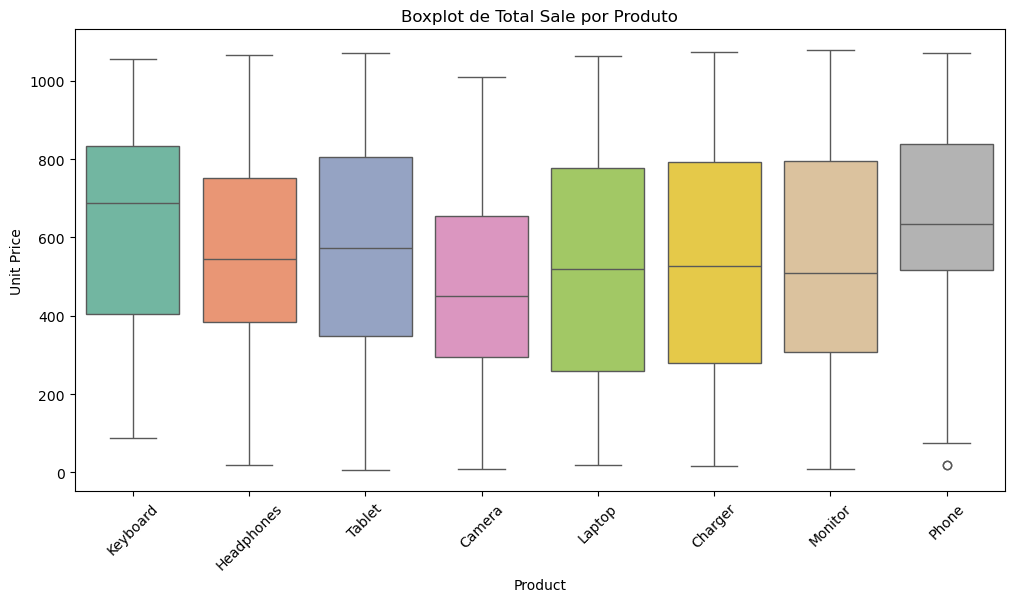

In [499]:
def showboxplot():    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x="Product", y="Unit Price", palette="Set2",hue="Product")
    plt.title("Boxplot de Total Sale por Produto")
    plt.xticks(rotation=45)
    plt.show()

showboxplot()

Charger = 5000-4000 NGN -> faixa de 10-20 reais a unidade

Criei uma função para aplicar uma redução personalizada com base um valor minimo escolhido

Além de recalcular o Valor Total das vendas


In [500]:
df[df["Product"] =="Charger"][["Unit Price","Total Sale"]].head()

,Unit Price,Total Sale
15,19.74,907.95
16,358.94,16511.36
27,1049.87,44094.61
38,262.94,20771.97
50,526.44,24216.38


In [501]:
def attValorTipo(vmultiplicar:float, minimo: int, tipo: str):
    df["Unit Price"] = df.apply(lambda linha: (
        linha["Unit Price"] * vmultiplicar if linha["Unit Price"] > minimo and linha["Product"] == tipo else linha["Unit Price"]
    ),axis=1)

    df["Total Sale"] = df.apply(lambda linha: (
    linha["Unit Price"] * linha["Units Sold"] if linha["Product"] == tipo else linha["Total Sale"]
    ),axis=1)
    
    return df[df["Product"] == tipo][["Unit Price","Total Sale","Units Sold"]].head(10)

attValorTipo(0.1,200,"Charger")

,Unit Price,Total Sale,Units Sold
15,19.740,908.040,46
16,35.894,1651.124,46
27,104.987,4409.454,42
38,26.294,2077.226,79
50,52.644,2421.624,46
66,73.578,6916.332,94
69,52.384,2409.664,46
70,52.644,2421.624,46
79,52.904,2433.584,46
95,103.182,4746.372,46


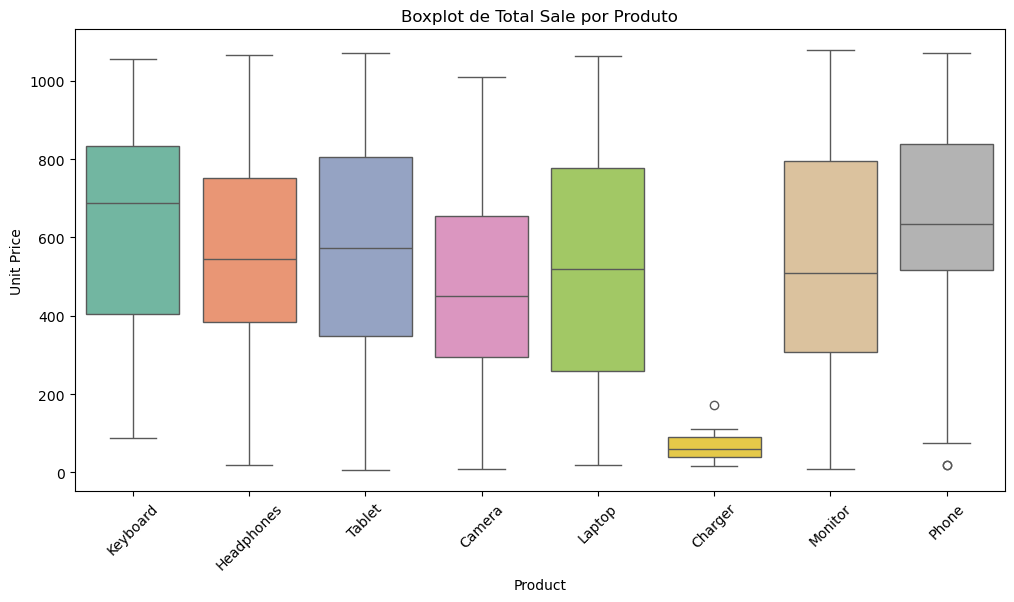

In [502]:
showboxplot()

In [503]:
df[df["Product"] =="Headphones"][["Unit Price","Total Sale"]].head(10)

,Unit Price,Total Sale
1,964.77,48238.73
18,450.91,19389.29
19,333.54,25682.44
22,942.10,31089.21
52,786.08,39304.25
54,561.04,28052.21
60,544.95,27247.46
62,576.62,28830.88
87,587.47,38185.45
89,427.18,26485.46


Os fones iam normalmente até 400 reais. Acima disso reduzi 30%


In [504]:
attValorTipo(vmultiplicar=0.3,minimo=400,tipo="Headphones")

,Unit Price,Total Sale,Units Sold
1,289.431,14471.550,50
18,135.273,5816.739,43
19,333.540,25682.580,77
22,282.630,9326.790,33
52,235.824,11791.200,50
54,168.312,8415.600,50
60,163.485,8174.250,50
62,172.986,8649.300,50
87,176.241,11455.665,65
89,128.154,7945.548,62


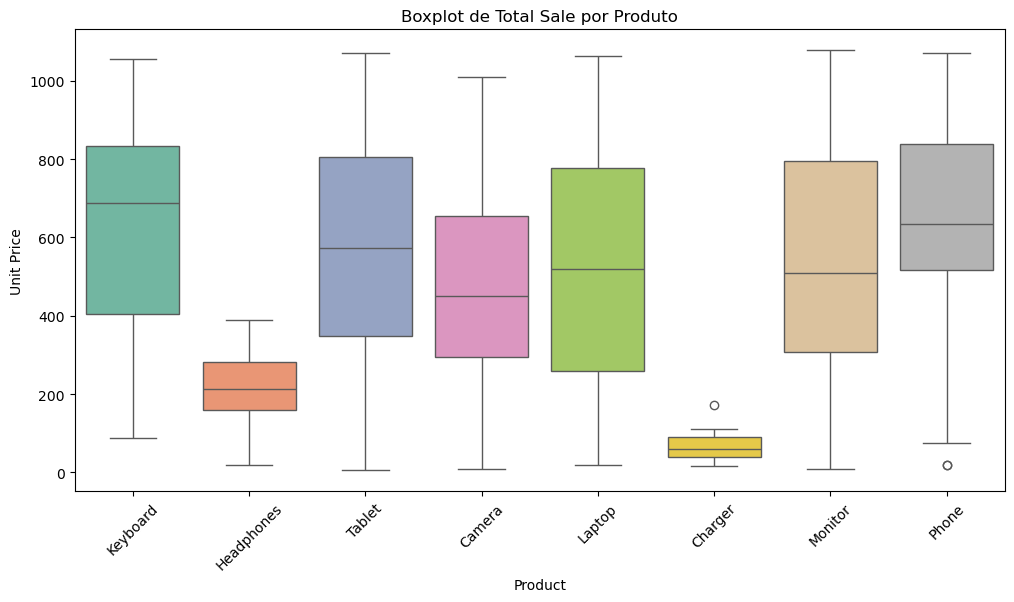

In [505]:
showboxplot()

In [506]:
df.groupby("Product")["Unit Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
Camera,65.0,475.328000,264.140021,9.16,294.6600,450.510,654.0800,1010.81
Charger,59.0,64.520322,31.349366,16.99,38.3585,58.463,89.8495,172.09
Headphones,57.0,220.822298,83.094804,19.29,158.6550,212.721,282.6300,389.47
Keyboard,89.0,623.399326,282.670224,87.05,404.6400,687.540,833.2800,1056.81
Laptop,67.0,529.743284,315.576098,18.68,259.8200,519.120,778.3600,1064.58
Monitor,71.0,545.384648,287.806598,8.68,307.0200,510.290,794.6600,1077.98
Phone,57.0,632.903684,272.403690,18.76,517.5800,635.620,838.5500,1072.29
Tablet,85.0,564.874588,294.930648,5.05,348.5700,573.240,805.5500,1071.02


In [507]:
df["Unit Price"] = df["Unit Price"].round(2)

In [508]:
df.to_csv("nigeriatratada.csv")